In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
import sys
import numpy as np

In [3]:
sys.path.append("/home/lowik/carvana/")

In [4]:
model = load_model("../data/model3.contours.960x640.weights.06-0.9910.hdf5", compile=False)

In [5]:
from PIL import Image

In [141]:
mask = np.array(Image.open("../data/train_masks/48b3f0c936b5_11_mask.gif"))
img = np.array(Image.open("../data/train_960x640/00087a6bd4dc_06.png"))

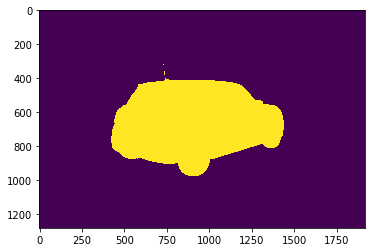

In [142]:
plt.imshow(mask)

In [136]:
r, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

In [138]:
stats

array([[     0,      0,    960,    640, 508565],
       [   347,    220,      6,     14,     16],
       [   244,    235,    508,    289, 105819]], dtype=int32)

In [98]:
img_norm = (img - 127)/255

In [99]:
img_norm.shape

(640, 960, 3)

In [100]:
img_norm = img_norm.reshape((1, 640, 960, 3))

In [101]:
img_norm.shape

(1, 640, 960, 3)

In [102]:
pred = model.predict(img_norm)

In [103]:
pred.shape

(1, 640, 960, 1)

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

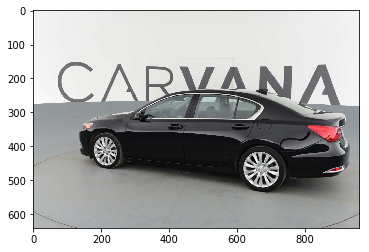

In [105]:
plt.imshow(img)

In [106]:
(pred[0,...] > 0.5).astype(np.uint8).shape

(640, 960, 1)

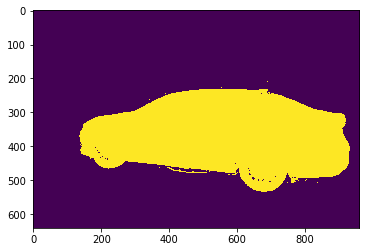

In [107]:
plt.imshow((pred[0,:,:,0] > 0.5).astype(np.uint8))

In [108]:
def scale(mask):
    mask_u8 = (mask * 255).astype(np.uint8)
    mask_u8_full = cv2.resize(mask_u8, (1918, 1280),
                              interpolation=cv2.INTER_CUBIC)
    return (mask_u8_full > 127).astype(np.uint8)

In [109]:
import cv2

In [110]:
mf = scale(pred[0,...])

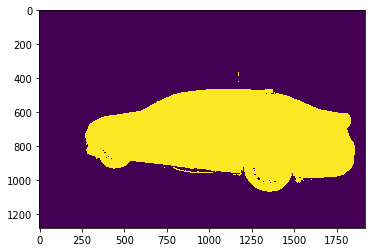

In [111]:
plt.imshow(mf)

In [112]:
cv2.imwrite("../data/gasjkljgl.png", mf * 255)

True

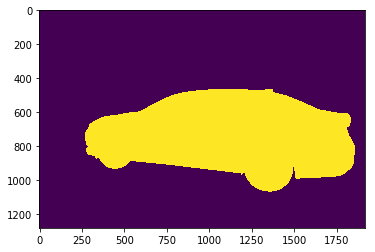

In [113]:
plt.imshow(mask)

In [114]:
diff = np.zeros(mask.shape[:2] + (3, ), dtype=np.uint8)

In [115]:
diff[..., 0] = mask * 255
diff[..., 1] = mf * 255

In [116]:
cv2.imwrite("../data/err.png", diff)

True

In [117]:
r, labels, stats, centroids = cv2.connectedComponentsWithStats(mf)

In [118]:
r

40

In [130]:
biggest_label = np.argsort(stats[1:, -1], axis=-1)[::-1][0] + 1

In [131]:
biggest_label

12

In [129]:
np.argsort(stats[1:, -1], axis=-1)

array([ 4, 26, 38,  1, 35, 30, 22,  6, 10, 29, 19,  7, 13, 36, 18,  9, 14,
       20,  0, 31, 12,  8, 17, 37, 21, 25, 27, 24, 32,  3, 34, 28, 15,  5,
       16,  2, 33, 23, 11])

In [119]:
biggest = -1
biggest_area = -1
for i in range(r):
    if i != 0 and stats[i, -1] > biggest_area:
        biggest = i
        biggest_area = stats[i, -1]

In [120]:
biggest

12

In [121]:
mask_cleaned = (labels == biggest).astype(np.uint8)

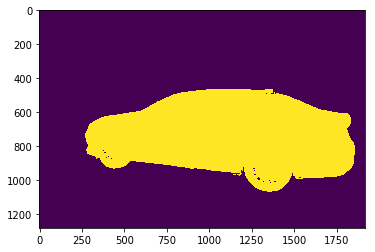

In [122]:
plt.imshow(mask_cleaned)

In [123]:
statsb

array([[   662,    333,      1,      7,      7],
       [  1172,    359,      3,     29,     57],
       [  1171,    415,      5,      9,     27],
       [  1375,    419,      1,      1,      1],
       [  1170,    437,      4,     13,     36],
       [  1469,    438,      1,      2,      2],
       [  1469,    442,      1,      5,      5],
       [  1174,    451,      3,      4,      9],
       [  1199,    451,      1,      2,      2],
       [   966,    456,      7,      6,     27],
       [   177,    460,   1673,    540, 645700],
       [  1467,    468,      1,      1,      1],
       [   734,    514,      1,      2,      2],
       [   733,    518,      2,      5,      9],
       [  1614,    550,      6,      4,     18],
       [  1707,    911,      7,      3,     15],
       [  1721,    912,      1,      1,      1],
       [   342,    918,      3,      6,     13],
       [  1207,    929,     60,      6,    199],
       [  1167,    931,     14,      3,     36],
       [  1289,    9

In [124]:
def dice_coef(y_true, y_pred):
    y_true_f = y_true.ravel()
    y_pred_f = y_pred.ravel()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))

In [125]:
dice_coef(mask, mf)

0.99306080342621872

In [126]:
dice_coef(mask, mask_cleaned)

0.99525269052612175